<a href="https://colab.research.google.com/github/plisssa/lab1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Пузырёва Елизавета БВТ2104

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [ ]:
print('Hello, World!')

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [ ]:
import random
import time
import matplotlib.pyplot as plt

In [ ]:
user_m = input()
user_n = input()
user_min_limit = input()
user_max_limit = input()
user_m, user_n, user_min_limit, user_max_limit

5
5

5


('5', '5', '', '5')

In [ ]:
m = int(input())
n = int(input())
min_limit = int(input())
max_limit = int(input())
matrix = [[random.randint(min_limit, max_limit) for _ in range(m)] for _ in range(n)]


5
5
0
10


### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [ ]:
import copy

In [ ]:
def generateMatrix(m, n, min_limit, max_limit):
  return [[random.randint(min_limit, max_limit) for _ in range(m)] for _ in range(n)]

Встроенная сортировка:
--- 82298 ns ---


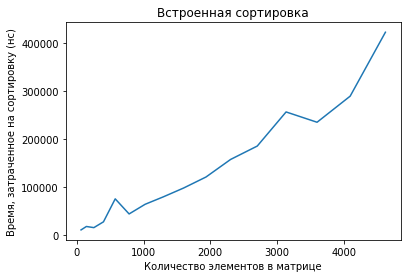

In [ ]:
#На больших списках он работает как сортировка слиянием, на маленьких как сортировка вставками
m = 8
n = 8
NUM_MATRIXES = 16
NUM_INCREASE = 4

minLimit = 0
maxLimit = 20
useOnce = False

#print("Генерируем матрицу:")
matrix = generateMatrix(m, n, minLimit, maxLimit)
defaultSortMatrix = copy.deepcopy(matrix)
#print(*defaultSortMatrix, sep='\n', end='\n\n')

matrixes = []
x_layer = []
for i in range(NUM_MATRIXES):
  matrixes.append(generateMatrix(m, n, minLimit, maxLimit))
  x_layer.append(m * n)
  m += NUM_INCREASE
  n += NUM_INCREASE

def compareMatrix(m1, m2):
  if(len(m1) != len(m2)): return False
  if(len(m1[0]) != len(m2[0])): return False
  for i in range(len(m1)):
    for j in range(len(m1[0])):
      if m1[i][j] != m2[i][j]:
        return False
  return True


print("Встроенная сортировка:")
start_time = time.time_ns()
defaultSortMatrix = list(map(sorted, defaultSortMatrix))
defaultSortTime = time.time_ns() - start_time
print("--- {0} ns ---".format(round(defaultSortTime)))

arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  list(map(sorted, arr[i]))
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Встроенная сортировка")
plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
# Сортировка выбором - это улучшенная версия пузырьковой сортировки
# Берётся срез массива, ищется наименьший элемент в списке и помещся его в начало, либо ищется самый крупный элемент и помещается в конец списка,
# после чего срез уменьшается и цикл повторяется.
start_time = time.time()
def chooseSort(matrix):
  for i in range(len(matrix)):
    arr = matrix[i]
    for j in range(len(arr)):
      minVal = arr[j]
      minIdx = j
      for k in range(j + 1, len(arr)):
        if(arr[k] < minVal):
          minVal = arr[k]
          minIdx = k
      arr[j], arr[minIdx] = arr[minIdx], arr[j]
  return matrix

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
print("Сортировка выбором:")
start_time = time.time_ns()
sortedMatrix = chooseSort(matrix)
chooseSortTime = time.time_ns() - start_time 
print("--- {0} ns ---".format(round((chooseSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(chooseSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
  print("Встроенная сортировка эффективнее")

--- 0 ms ---
Сортировка выбором:
--- 155725 ns ---
Матрица отсортирована корректно
Встроенная сортировка эффективнее


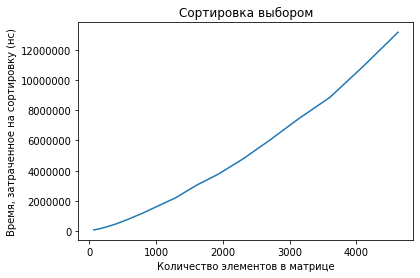

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  chooseSort(arr[i])
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Сортировка выбором")
plt.ticklabel_format(style = 'plain')
plt.show()


In [ ]:
# Сортировка вставкой - последовательно сравнивает все элементы массива (сравнивает соседние элементы)
#и ставит элементы в списке в нужном порядке
start_time = time.time()
#TODO
def insertionSort(matrix):
    for i in range(1, len(matrix)):
        x = matrix[i]
        index = i
        while index > 0 and matrix[index - 1] > x:
            matrix[index] = matrix[index-1]
            index -= 1
        matrix[index] = x
    return matrix

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
print("Сортировка вставкой:")
start_time = time.time_ns()
sortedMatrix = insertionSort(matrix)
insertionSortTime = time.time_ns() - start_time 
print("--- {0} ns ---".format(round((insertionSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(insertionSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
  print("Встроенная сортировка эффективнее")

--- 0 ms ---
Сортировка вставкой:
--- 122502 ns ---
Матрица отсортирована некорректо
Встроенная сортировка эффективнее


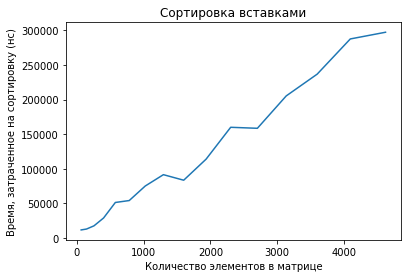

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  insertionSort(arr[i])
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Сортировка вставками")
plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
# Сортировка обменом. || Сортировка пузырьком.
start_time = time.time()

def bubbleSort(arr):
    for s in arr:
        for i in range(len(s)):
            for j in range(len(s) - i - 1):
                if s[j] > s[j+1]:
                    s[j], s[j+1] = s[j+1], s[j]
    return arr

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
print("Сортировка пузырьком:")
start_time = time.time_ns()
sortedMatrix = bubbleSort(matrix)
bubbleSortTime = time.time_ns() - start_time 
print("--- {0} ns ---".format(round((bubbleSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(bubbleSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
    print("Встроенная сортировка эффективнее")

--- 0 ms ---
Сортировка пузырьком:
--- 151977 ns ---
Матрица отсортирована некорректо
Встроенная сортировка эффективнее


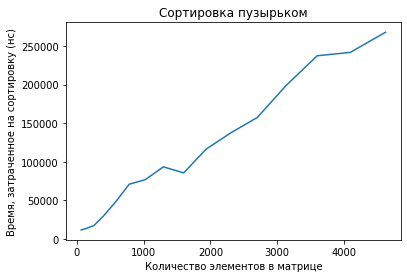

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  insertionSort(arr[i])
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Сортировка пузырьком")
plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
# Сортировка Шелла.
start_time = time.time()

def shellSort(matrix):
    for i in range(len(matrix)):
        arr = matrix[i]
        step = len(arr) // 2
        while step > 1:
            for j in range(step):
                if arr[j] > arr[step + j]:
                    arr[j], arr[step + j] = arr[step + j], arr[j]
            step //= 2
        for j in range(1, len(arr)):
            x = arr[j]
            index = j
            while index > 0 and arr[index - 1] > x:
                arr[index] = arr[index - 1]
                index -= 1
            arr[index] = x
    return matrix
    

print("Сортировка Шелла:")
start_time = time.time_ns()
sortedMatrix = shellSort(matrix)
shellSortTime = time.time_ns() - start_time 
print("--- {0} ns  ---".format(round((shellSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(shellSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
  print("Встроенная сортировка эффективнее")

Сортировка Шелла:
--- 115448 ns  ---
Матрица отсортирована некорректо
Встроенная сортировка эффективнее


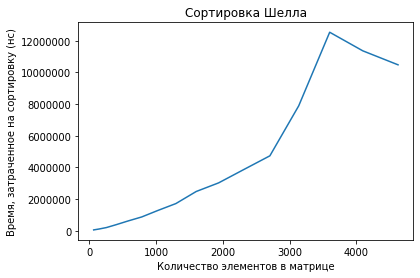

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  shellSort(arr[i])
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Сортировка Шелла")
plt.ticklabel_format(style = 'plain')
plt.show()

In [ ]:
# Быстрая сортировка.
start_time = time.time()
#TODO
def fastSort(matrix):
  def quicksort(array):
    if len(array) < 2:
      return array
    x = array[0]
    l = [i for i in array[1:] if i <= x]
    r = [i for i in array[1:] if i > x]
    return quicksort(l) + [x] + quicksort(r)

  for i in range(len(matrix)):
    matrix[i] = quicksort(matrix[i])
  
  return matrix

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
print("Быстрая сортировка:")
start_time = time.time_ns()
sortedMatrix = fastSort(matrix)
fastSortTime = time.time_ns() - start_time 
print("--- {0} ns ---".format(round((fastSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(fastSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
  print("Встроенная сортировка эффективнее")

--- 0 ms ---
Быстрая сортировка:
--- 269957 ns ---
Матрица отсортирована некорректо
Встроенная сортировка эффективнее


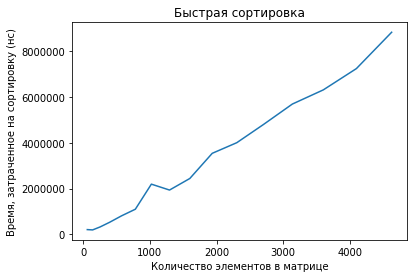

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  fastSort(arr[i])
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Быстрая сортировка")
plt.ticklabel_format(style = 'plain')
plt.show()

In [32]:
# Турнирная сортировка
#Элементы исходного множества представляются листьями дерева. Их попарное сравнение позволяет определить минимальный (максимальный) элемент.
#Метод турнирной сортировки основан на повторяющихся поисках наименьшего ключа среди пэлементов, среди оставшихся п— 1 элементов и т.д
start_time = time.time()

def genThree(arr):
    three = [arr]
    while(len(three[-1]) != 1):
        layer = []
        for i in range(1, len(three[-1]), 2):
            layer.append(three[-1][i] if three[-1][i] < three[-1][i - 1] else three[-1][i - 1])
        if len(three[-1]) % 2 == 1:
            layer.append(three[-1][-1])
        three.append(layer)
    return three

def remakeThree(three, elem):
    mx = max(three[0]) + 1
    idx = three[0].index(elem)
    three[0][idx] = mx
    for i in range(0, len(three) - 1):
        if idx % 2 == 1:
            pair = three[i][idx - 1]
        elif idx != (len(three[i]) - 1):
            pair = three[i][idx + 1]
        else:
            pair = three[i][idx]
        if pair > three[i][idx]:
            pair = three[i][idx]
        idx //= 2
        three[i + 1][idx] = pair
    return three

def tournamentSort(arr):
    three = genThree(arr)
    new_arr = [three[-1][0]]
    while(len(new_arr) != len(arr)):
        three = remakeThree(three, new_arr[-1])
        new_arr.append(three[-1][0])
    return new_arr


print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
print("Быстрая сортировка:")
start_time = time.time_ns()
sortedMatrix = list(map(tournamentSort, copy.deepcopy(matrix)))
tournamentSortTime = time.time_ns() - start_time 
print("--- {0} ns ---".format(round((tournamentSortTime))))
print("Матрица отсортирована корректно" if compareMatrix(sortedMatrix, defaultSortMatrix) else "Матрица отсортирована некорректо")
if(tournamentSortTime < defaultSortTime):
  print("Сортировка эффективнее встроенной")
else:
  print("Встроенная сортировка эффективнее")

--- 1 ms ---
Быстрая сортировка:
--- 406947 ns ---
Матрица отсортирована корректно
Встроенная сортировка эффективнее


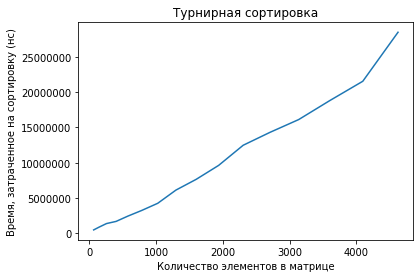

In [ ]:
arr = copy.deepcopy(matrixes)
y_layer = []
for i in range(NUM_MATRIXES):
  start_time = time.time_ns()
  list(map(tournamentSort, arr[i]))
  y_layer.append(time.time_ns() - start_time)
plt.plot(x_layer, y_layer)
plt.xlabel("Количество элементов в матрице")
plt.ylabel("Время, затраченное на сортировку (нс)")
plt.title("Турнирная сортировка")
plt.ticklabel_format(style = 'plain')
plt.show()

### Вывод
